#**Exercise 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.datasets import load_wine
wine = load_wine()

print(wine.data.shape)
A = wine.data
for i in range(A.shape[1]):
  A[:,i] = -1 + 2*((A[:,i]-min(A[:,i]))/(max(A[:,i])-min(A[:,i])))
print(wine.target.shape)

print("No. of classes are ",len(np.unique(wine.target)), "\nand they are labeled as ", np.unique(wine.target))
n = wine.data.shape[0]
d = wine.data.shape[1] 


(178, 13)
(178,)
No. of classes are  3 
and they are labeled as  [0 1 2]


In [ ]:
y = 1.0*np.ones([A.shape[0],1])
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i] = -1

In [ ]:
indexarr = np.arange(n) 
np.random.seed(10)
np.random.shuffle(indexarr)

train_data = []
train_label = []
test_data = []
test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count = count + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

Coding required functions.

In [ ]:
def predict(w,x):
  a = np.matmul(w.T, x)
  if a > 0:
    return 1
  elif a ==0:
    return 0  
  else:
    return -1

In [ ]:
def compute_accuracy(data,labels,w):
  c = 0
  for i in range(len(labels)):
    term_2 = np.reshape(data[i], (np.shape(data)[1],1))
    if predict(w, term_2) == labels[i]:
      c = c + 1
  return c/len(labels)

In [ ]:
def compute_loss_h(model_w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(model_w.T, x))))

In [ ]:
def compute_objfnval_h(data,labels,model_w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(model_w)**2), sum(compute_loss_h(model_w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])


In [ ]:
def compute_grad_loss_h(x,y,w,i):
  loss = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    loss = np.multiply(lamda, w)/x.shape[0]
  else:
    loss = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/x.shape[0]
  return loss


In [ ]:
def compute_orthogonal_projection(u):
  min_val = np.zeros(len(u))
  for i in range(len(u)):
    if u[i] < -1:
      min_val[i] = -1
    elif abs(u[i]) <= 1:
      min_val[i] = u[i]  
    else:
      min_val[i] = 1
  return min_val

In [ ]:
def OPT1_h(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fun = []
  test_accuracy = []
  train_accuracy = []
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_h(data,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    obj = compute_objfnval_h(data,label,w)
    train_acc = compute_accuracy(train_data, train_label, w)  
    test_acc = compute_accuracy(test_data, test_label, w)  
    obj_fun.append(obj)    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

  return w, obj_fun, test_accuracy, train_accuracy

**Que 6.**
a)

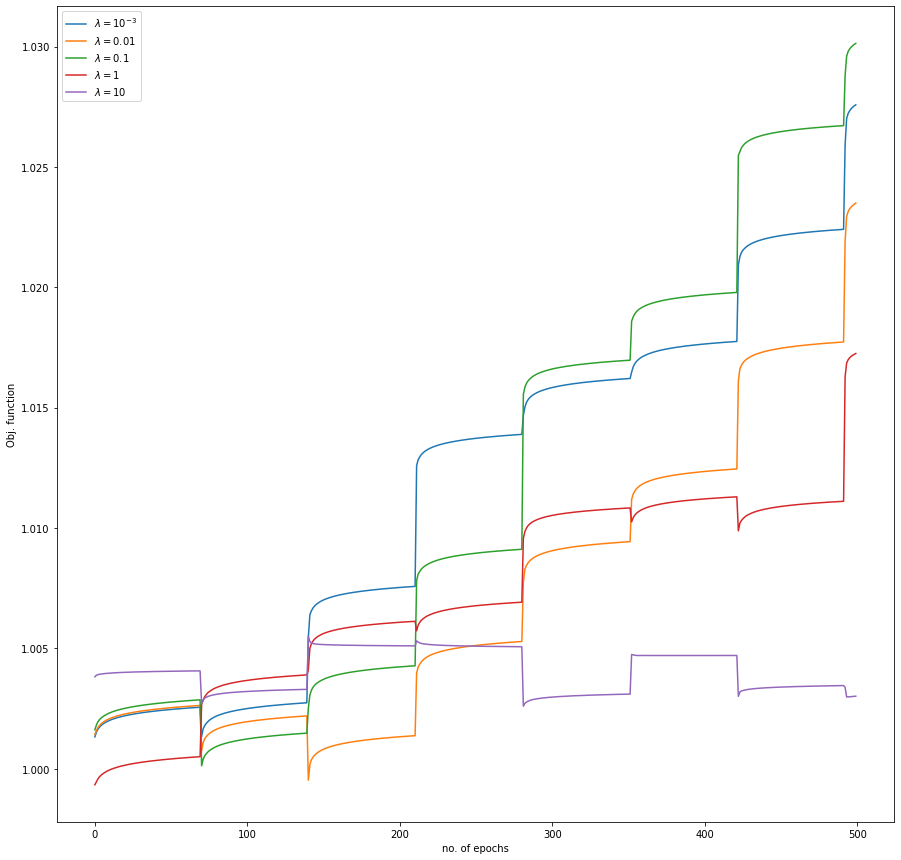

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01 ,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_h(train_data,train_label,lamda, num_epochs)
  plt.plot(fun_value)
plt.xlabel('no. of epochs')
plt.ylabel('Obj. function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

**b)**

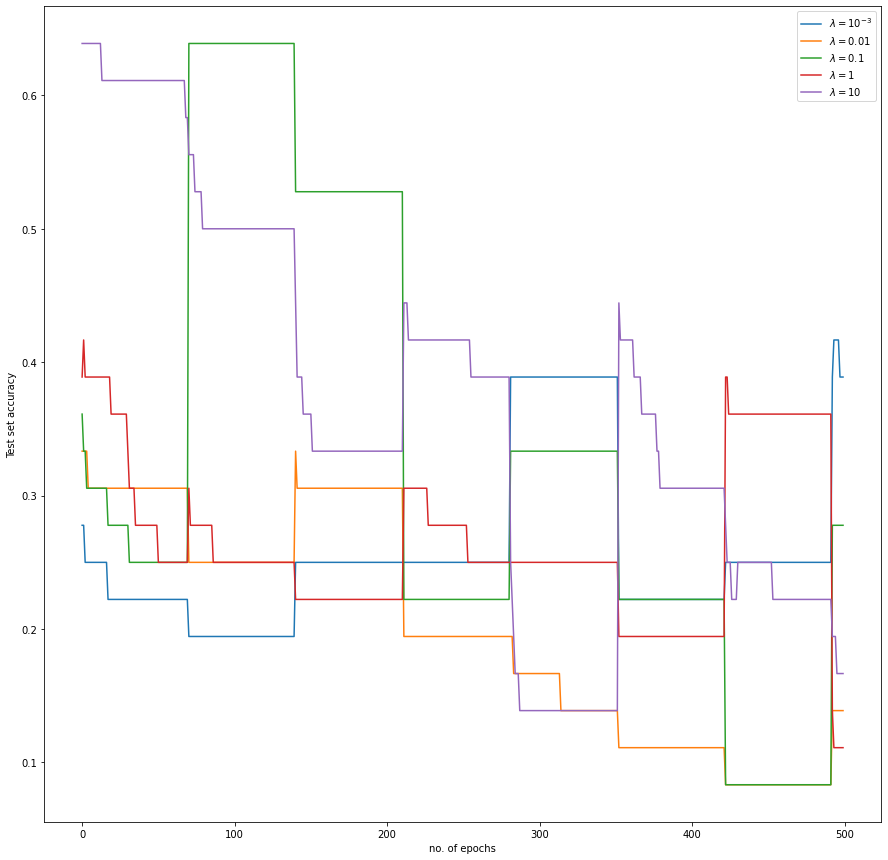

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01 ,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_h(train_data,train_label,lamda, num_epochs)
  plt.plot(test)
plt.xlabel('no. of epochs')
plt.ylabel('Test set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

**c)**

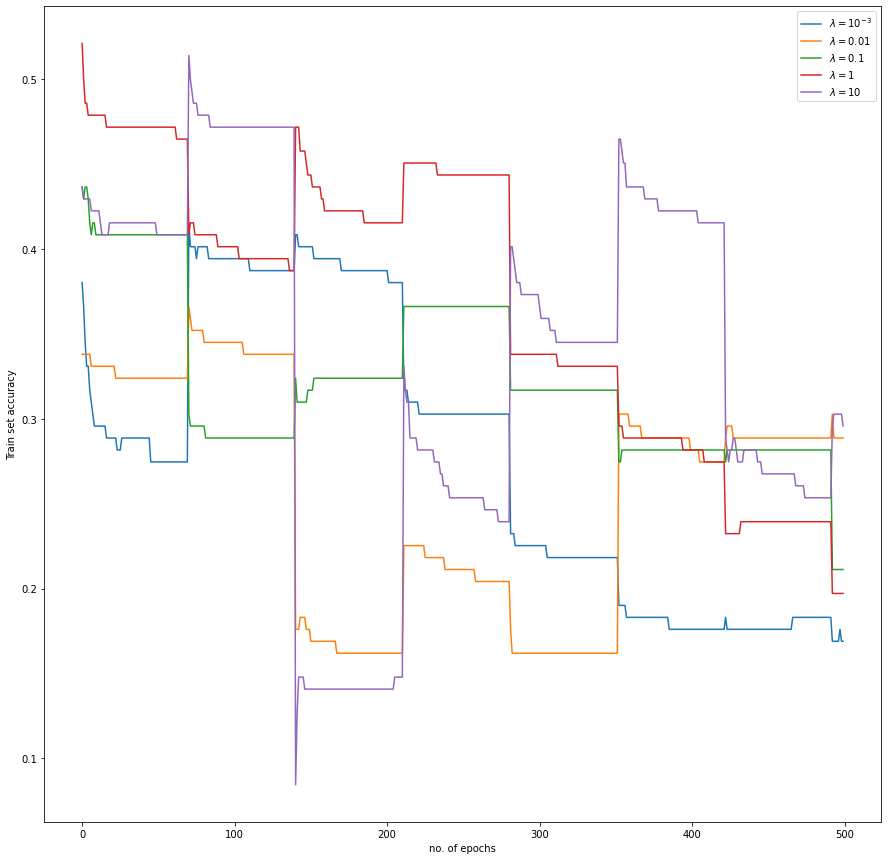

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_h(train_data,train_label,lamda, num_epochs)
  plt.plot(train)
plt.xlabel('no. of epochs')
plt.ylabel('Train set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

**d)**

In [ ]:
num_epochs = 500
table_plt = [["lamda values" , "Test accuracy" , "Traininig accuracy"]]
lamda_lst = [0.001 ,0.01 , 0.1 , 1 , 10]
for lamda in lamda_lst:
  w , f_val , test , train = OPT1_h(train_data , train_label , lamda , num_epochs)
  table_plt.append([lamda , test[-1] , train[-1]])
print(tabulate(table_plt , headers = 'firstrow', tablefmt = 'fancygrid'))   

  lamda values    Test accuracy    Traininig accuracy
--------------  ---------------  --------------------
         0.001        0.0277778              0.126761
         0.01         0.416667               0.295775
         0.1          0.333333               0.295775
         1            0.138889               0.288732
        10            0.222222               0.295775


**e)**
Comment : We can observe that with changing values of lamda test set accuracy and training set accuracy are almost changing(less changing for training set).
Test set accuracy is highest for lamda = 0.01. 

**Que 7)**

# $L_l$

In [ ]:
def compute_loss_log(model_w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(model_w.T, x)))))

In [ ]:
def compute_objfnval_log(data,labels,model_w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(model_w)**2), sum(compute_loss_log(model_w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])


In [ ]:
def compute_grad_loss_log(data, label,model_w ,i):
  return np.subtract(np.multiply(lamda, model_w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(model_w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(model_w, np.transpose(data[i]))))))/data.shape[0]


In [ ]:
def OPT1_log(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fun = []
  test_accuracy = []
  train_accuracy = []
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_log(data,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    obj = compute_objfnval_h(data,label,w)
    train_acc = compute_accuracy(train_data, train_label, w)  
    test_acc = compute_accuracy(test_data, test_label, w)  
    obj_fun.append(obj)    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
   

  return w, obj_fun, test_accuracy, train_accuracy

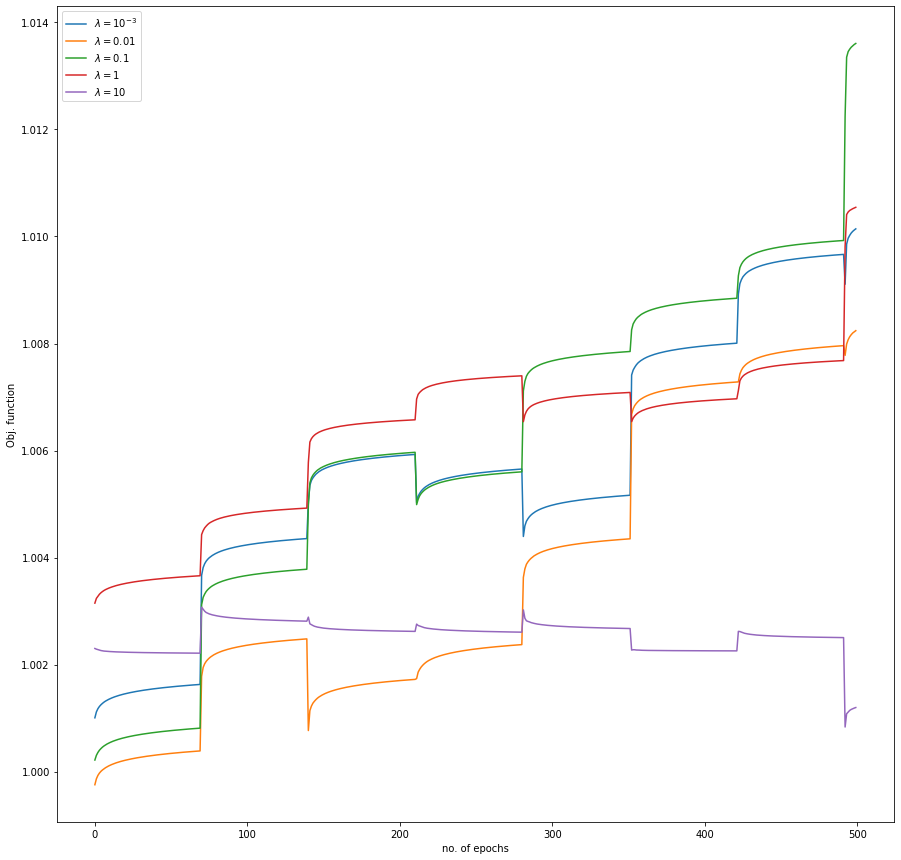

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_log(train_data,train_label,lamda, num_epochs)
  plt.plot(fun_value)
plt.xlabel('no. of epochs')
plt.ylabel('Obj. function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

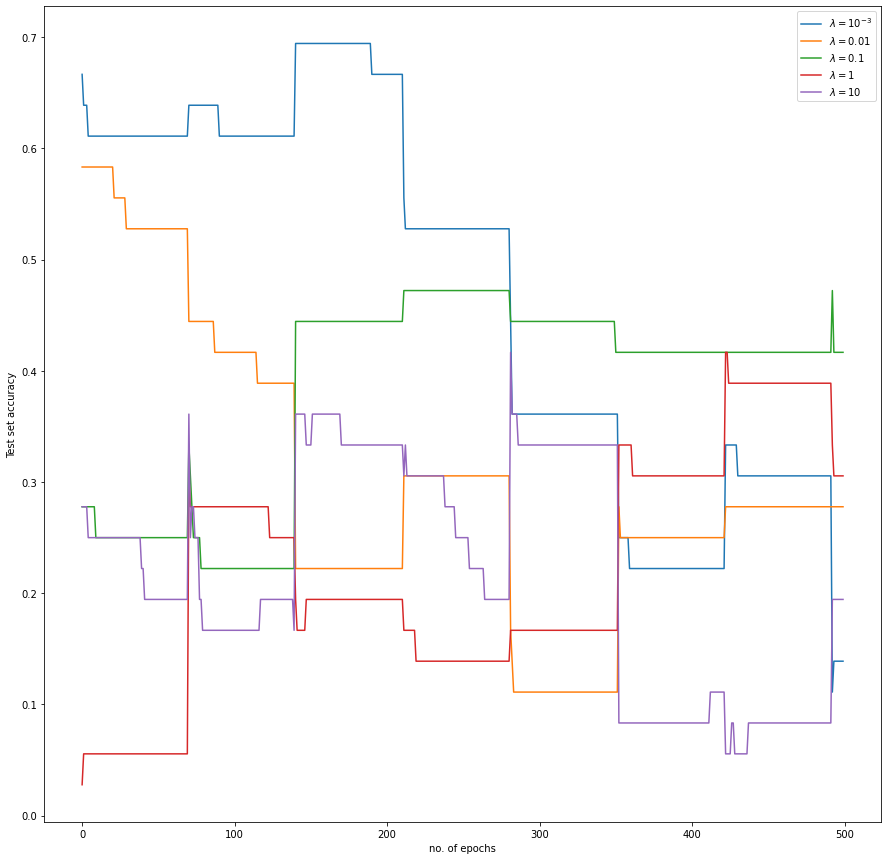

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_log(train_data,train_label,lamda, num_epochs)
  plt.plot(test)
plt.xlabel('no. of epochs')
plt.ylabel('Test set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

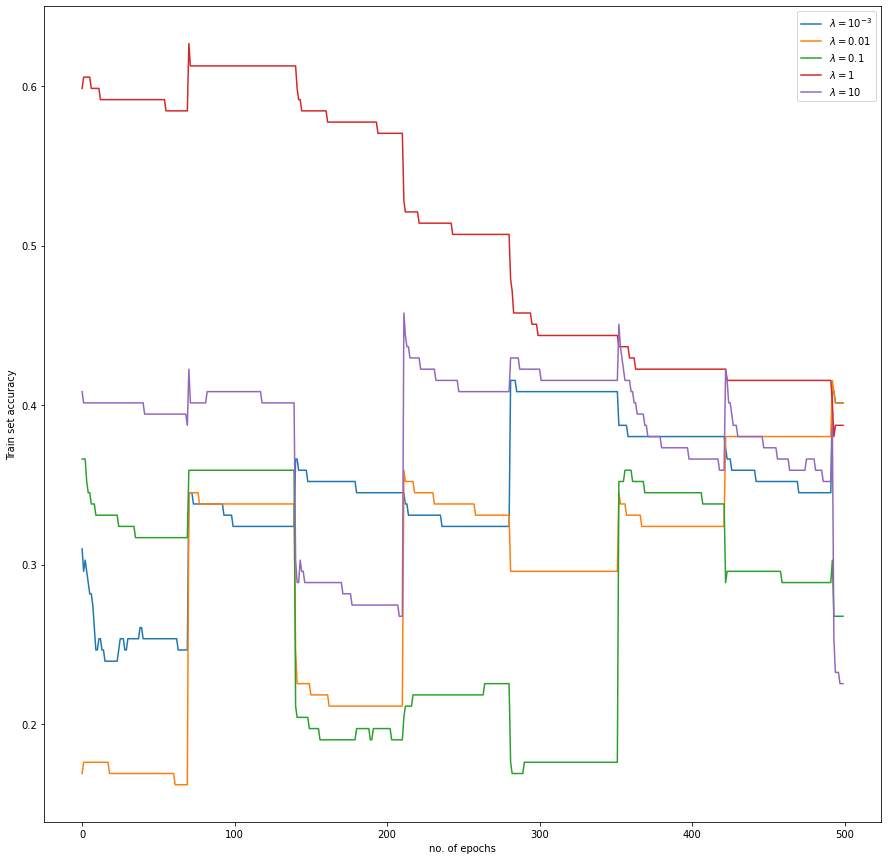

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_log(train_data,train_label,lamda, num_epochs)
  plt.plot(train)
plt.xlabel('no. of epochs')
plt.ylabel('Train set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

In [ ]:
num_epochs = 500
table_plt = [["lamda values" , "Test accuracy" , "Traininig accuracy"]]
lamda_lst = [0.001 ,0.01 , 0.1 , 1 , 10]
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_log(train_data , train_label , lamda , num_epochs)
  table_plt.append([lamda , test_acc[-1] , train_acc[-1]])
print(tabulate(table_plt , headers = 'firstrow', tablefmt = 'fancygrid'))

  lamda values    Test accuracy    Traininig accuracy
--------------  ---------------  --------------------
         0.001         0.194444              0.295775
         0.01          0.194444              0.176056
         0.1           0.472222              0.373239
         1             0.277778              0.373239
        10             0.194444              0.352113


 **Comment :**
We can observe that with changing values of lamda test set accuracy and training set accuracy are also changing.
Test set accuracy is highest for lamda = 0.1 and for trainig set it is highest at lamda = 0.1 and 1.


**Que 7)**

#$L_{sh}$

In [ ]:
def compute_loss_sq_h(model_w,x,y):
  return (max(0, np.subtract(1, np.dot(y, np.dot(model_w.T, x)))))**2

In [ ]:
def compute_objfnval_sq_h(data,labels,model_w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(model_w)**2), sum(compute_loss_sh(model_w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_sq_h(x,y,w,i):
  loss = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    loss = np.multiply(lamda, w)/x.shape[0]
  else:
    loss = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/x.shape[0]
  return loss

In [ ]:
def OPT1_sq_h(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fun = []
  test_accuracy = []
  train_accuracy = []
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_sq_h(data,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    obj = compute_objfnval_h(data,label,w)
    train_acc = compute_accuracy(train_data, train_label, w)  
    test_acc = compute_accuracy(test_data, test_label, w)  
    obj_fun.append(obj)    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    
  return w, obj_fun, test_accuracy, train_accuracy

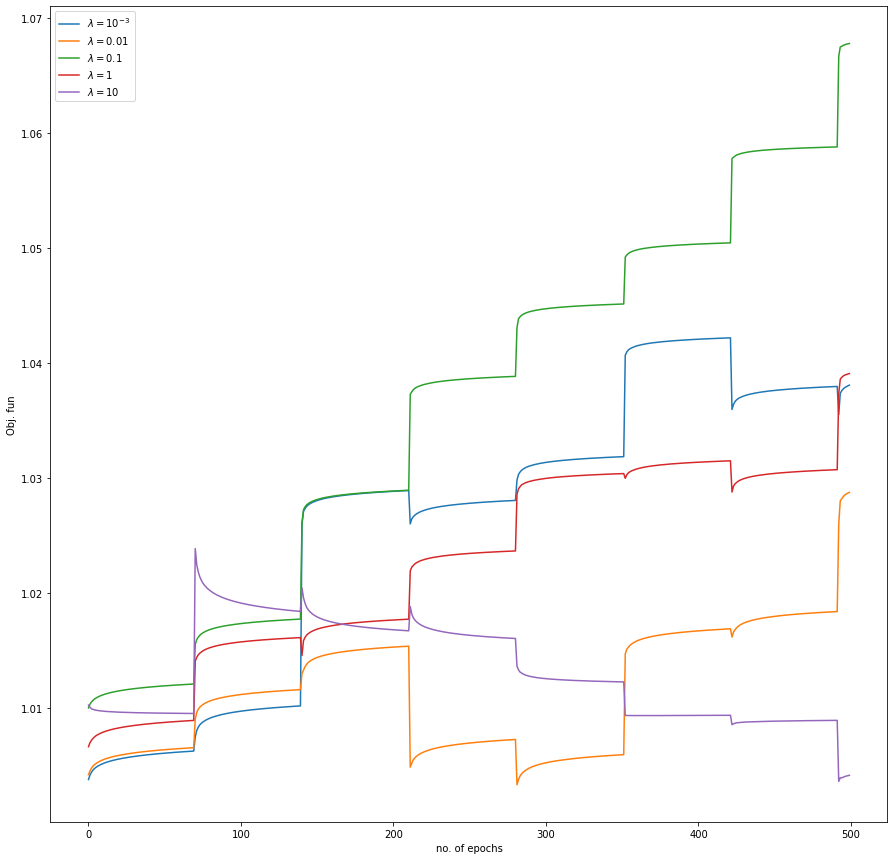

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_sq_h(train_data,train_label,lamda, num_epochs)
  plt.plot(fun_value)
plt.xlabel('no. of epochs')
plt.ylabel('Obj. fun')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

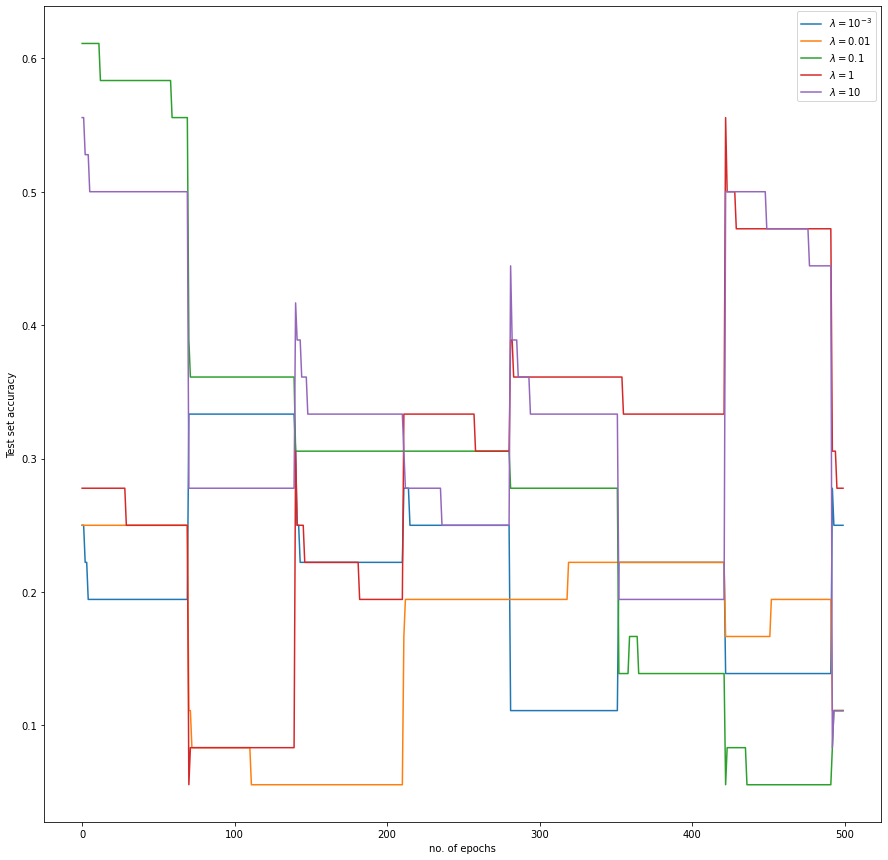

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_sq_h(train_data,train_label,lamda, num_epochs)
  plt.plot(test)
plt.xlabel('no. of epochs')
plt.ylabel('Test set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

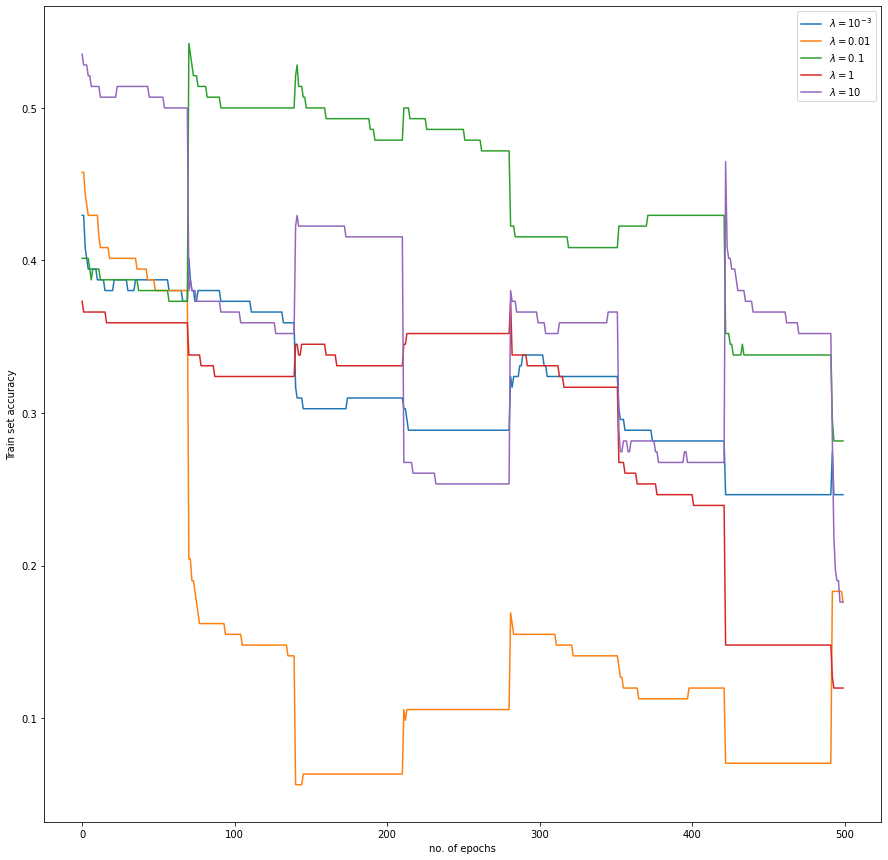

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_sq_h(train_data,train_label,lamda, num_epochs)
  plt.plot(train)
plt.xlabel('no. of epochs')
plt.ylabel('Train set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

In [ ]:
num_epochs = 500
table_plt = [["lamda values" , "Test accuracy" , "Traininig accuracy"]]
lamda_lst = [0.001 ,0.01 , 0.1 , 1 , 10]
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sq_h(train_data , train_label , lamda , num_epochs)
  table_plt.append([lamda , test_acc[-1] , train_acc[-1]])
print(tabulate(table_plt , headers = 'firstrow', tablefmt = 'fancygrid'))

  lamda values    Test accuracy    Traininig accuracy
--------------  ---------------  --------------------
         0.001        0.333333               0.366197
         0.01         0.25                   0.302817
         0.1          0.0555556              0.176056
         1            0.361111               0.239437
        10            0.166667               0.253521


 **Observations:** 
 We can observe that with changing values of lamda test set accuracy and training set accuracy are also changing(less changing for training set).
Test set accuracy is highest for lamda = 1. 

From all the observations I can conclude that I am getting better accuracy by using logistic function compared to hinge loss and squared hinge loss function.